# Exercise 1 Implementation

Training

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

[[199 211 216 ...  27  25  11]
 [246 228 180 ... 152 138  15]
 [ 89  87  84 ... 171 171  10]
 ...
 [ 80  71  68 ... 166 166  36]
 [120 122 130 ...  38  39  14]
 [251 249 239 ...  42  43   5]] (416, 2577)
[[ 96  90 105 ... 203 122  37]
 [106 105 104 ...  57  56  11]
 [173 158 163 ...  36  37  41]
 ...
 [252 253 250 ... 146 155  30]
 [130 108  86 ... 109 101  10]
 [ 90 117 124 ...  15  26  10]] (104, 2577)


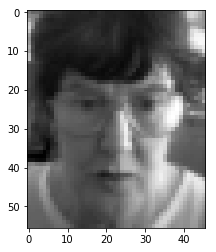

In [7]:
# Load the training and testing sets: 80% is training, 20% is testing

splittype = 'whole'

if (splittype == 'whole'):
    training = np.loadtxt('split_whole_train.gzip', dtype = 'uint8')
    test = np.loadtxt('split_whole_test.gzip', dtype = 'uint8')
elif (splittype == 'class'):
    training = np.loadtxt('split_class_train.gzip', dtype = 'uint8')
    test = np.loadtxt('split_class_test.gzip', dtype = 'uint8')
    
print (training, training.shape)
print (test, test.shape)

plt.imshow(np.reshape(training[100, :2576], (46,56)).T, cmap = 'gist_gray') 
# Print 100th image of the training set as a sanity check to make sure we have shuffled along the right dimension of the array

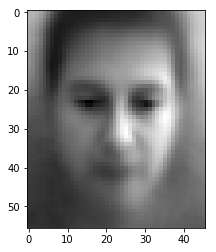

In [8]:
# Now let's start training our image recognition PCA algorithm
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training and testing set without the labels
# Images are represented as rows
pca_train = training [:, :2576]
pca_test = test [:, :2576]

# Let's compute the mean face image
avg_face = np.mean(pca_train, axis=0)
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[2549.32201715 2401.31097448 2202.99881541 ... -481.31266758
  -524.07125439 -529.76968149]
 [2401.31097448 2649.16974852 2510.97425111 ... -533.35766457
  -561.2323872  -568.32331731]
 [2202.99881541 2510.97425111 2631.03831708 ... -562.22416443
  -580.54844097 -576.12605168]
 ...
 [-481.31266758 -533.35766457 -562.22416443 ... 2793.86283631
  2607.22587486 2473.54942909]
 [-524.07125439 -561.2323872  -580.54844097 ... 2607.22587486
  2743.7138903  2638.72100361]
 [-529.76968149 -568.32331731 -576.12605168 ... 2473.54942909
  2638.72100361 2787.29176683]] (2576, 2576)


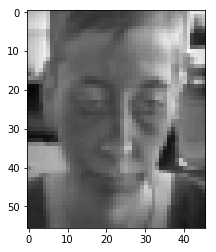

In [9]:
# Now let's subtract the mean face image from all of our training face images
pca_train_norm = pca_train-avg_face # works because of broadcasting
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and notice that it is distorted

# Computing the covariance matrix
cov = (np.dot(pca_train_norm.T, pca_train_norm))/416
print (cov, cov.shape)

In [10]:
# Computing the eigenvalues and eigenvectors of the covariance matrix directly and measuring how long it takes

start = time.time()
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we need to order them according to the eigenvalues
end = time.time()
print (end-start) # Execution time in seconds

print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)
print (eigvals.min()) # Note that the smallest eigenvalue (most negative) is a zero eigenvalue (rounding error)

6.296204090118408
[ 9.61191797e+05+0.0000000e+00j  5.25402886e+05+0.0000000e+00j
  4.62439919e+05+0.0000000e+00j ... -9.66034009e-14-1.5395907e-13j
  1.40986533e-13+0.0000000e+00j  2.89023305e-14+0.0000000e+00j] (2576,)
[[-1.40677772e-02+0.j         -1.54123151e-02+0.j
  -1.77773383e-02+0.j         ... -1.80818333e-03-0.00065591j
   4.85097891e-03+0.j          3.81455970e-04+0.j        ]
 [-1.56243925e-02+0.j         -1.58231115e-02+0.j
  -1.84859796e-02+0.j         ... -1.07187276e-03-0.00109151j
   1.51640411e-03+0.j          6.03121222e-04+0.j        ]
 [-1.65187450e-02+0.j         -1.53439659e-02+0.j
  -2.01298153e-02+0.j         ...  1.48045374e-04+0.00016606j
   5.79046013e-04+0.j          7.18395181e-05+0.j        ]
 ...
 [ 1.37067272e-03+0.j          4.76649349e-02+0.j
   3.79681662e-03+0.j         ...  1.58231222e-02-0.0140985j
   9.07967788e-03+0.j          1.22551878e-02+0.j        ]
 [ 1.37379468e-03+0.j          4.68988847e-02+0.j
   4.03436171e-03+0.j         ...  5.76104

In [11]:
# Proving that the eigenvalues and eigenvectors make sense

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]

print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # The values are basically zero, so the eigenvalue computation is correct

[-1.69166015e-10+0.j -8.18545232e-11+0.j -2.91038305e-11+0.j ...
 -1.09139364e-11+0.j -5.68434189e-12+0.j -6.59383659e-12+0.j] (2576,)


In [12]:
# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

[ 9.61191797e+05  5.25402886e+05  4.62439919e+05 ... -9.66034009e-14
  1.40986533e-13  2.89023305e-14] (2576,)
[[-1.40677772e-02 -1.54123151e-02 -1.77773383e-02 ... -1.80818333e-03
   4.85097891e-03  3.81455970e-04]
 [-1.56243925e-02 -1.58231115e-02 -1.84859796e-02 ... -1.07187276e-03
   1.51640411e-03  6.03121222e-04]
 [-1.65187450e-02 -1.53439659e-02 -2.01298153e-02 ...  1.48045374e-04
   5.79046013e-04  7.18395181e-05]
 ...
 [ 1.37067272e-03  4.76649349e-02  3.79681662e-03 ...  1.58231222e-02
   9.07967788e-03  1.22551878e-02]
 [ 1.37379468e-03  4.68988847e-02  4.03436171e-03 ...  5.76104580e-03
  -5.18914719e-03  1.57803034e-02]
 [ 1.35106934e-03  4.73688283e-02  5.51753350e-03 ... -4.42100706e-03
   6.46717173e-03  4.04693337e-03]] (2576, 2576)


In [9]:
# Order eigenvalues and eigenvectors according to the size of the eigenvalues

index = (abs(eigvals)).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]
print (index, index.shape)
print (eigvals, eigvals.shape)

# How many zero eigenvalues do we have?

print (np.linalg.matrix_rank(cov)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals == np.zeros(eigvals.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((abs(eigvals) >= np.ones(eigvals.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals.max()) # The largest eigenvalue
print (eigvals[414])
print (eigvals[415]) # Zero eigenvalue

[   0    1    2 ... 2523 2015 2016] (2576,)
[ 9.46910940e+05  5.32814234e+05  4.33036434e+05 ... -3.56098065e-16
 -4.60981504e-18 -4.60981504e-18] (2576,)
415
0
415
946910.9402704749
89.60926018772778
3.182512501058776e-11


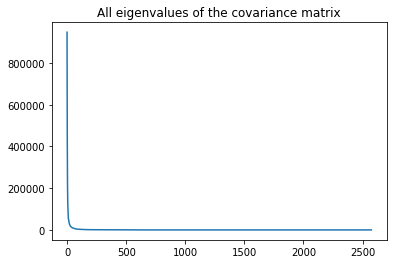

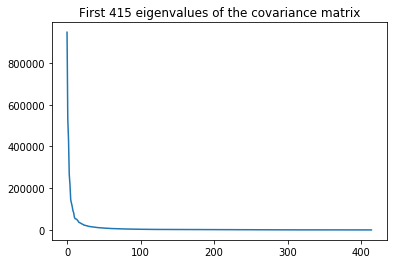

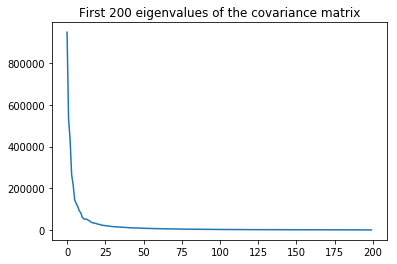

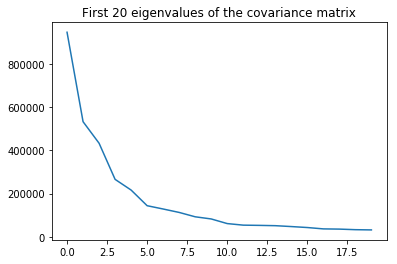

<Figure size 432x288 with 0 Axes>

In [10]:
# Let's visualise the eigenvalues

x = np.arange(0, 2576)

# All of them
plt.plot(x, eigvals) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [11]:
# We keep the largest n eigenvalues and their corresponding eigenvectors n<=415, the other eigenvalues are zero

n = 400
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[-2.54104010e+01  6.73924776e+01 -4.91269264e+02 ...  3.67037285e+01
   8.91357556e+00 -1.96134946e+01]
 [ 1.79112484e+02 -6.44821661e+02  7.03083718e+02 ...  2.63210232e+01
   4.81402357e+00  2.47495544e+00]
 [ 3.01549053e+02  1.77561906e+03 -7.83742971e+02 ... -5.25624766e+00
   5.07999143e+00 -9.31833767e-01]
 ...
 [ 8.98507365e+02  5.73297145e+02  8.66936601e+02 ... -1.50734595e+00
   1.39640157e+01  2.29757290e+00]
 [-1.38194396e+03  8.38834444e+02 -5.39555740e+02 ... -1.37186993e+01
  -7.47153261e-01  3.05525545e+00]
 [ 2.42239358e+03 -4.65755050e+02  1.54435913e+02 ... -8.26993480e+00
  -3.54549087e+00  1.26193964e+01]] (416, 400)


In [12]:
# Let's try to compute the eigenvalues using the low-dimensional method

# First we need to compute the new covariance matrix (1/N)A^T*A
cov_ld = np.dot(pca_train_norm, pca_train_norm.T)/416
print (cov_ld, cov_ld.shape) # as we can see it is NxN (and not DxD as the covariance matrix we had before)

[[ 4932.63014907  -296.09431585   844.71151001 ...  -918.05711979
   1884.17249952    90.13712369]
 [ -296.09431585  7122.81102693 -2864.34949336 ...  1558.79293452
  -3090.38129232  1289.91746647]
 [  844.71151001 -2864.34949336 18641.03325558 ...  2193.20933731
   3628.08799508   544.97569617]
 ...
 [ -918.05711979  1558.79293452  2193.20933731 ...  8421.19551519
  -3390.90659626  4369.07725867]
 [ 1884.17249952 -3090.38129232  3628.08799508 ... -3390.90659626
  13921.69081151 -7865.2964874 ]
 [   90.13712369  1289.91746647   544.97569617 ...  4369.07725867
  -7865.2964874  17786.24746369]] (416, 416)


In [13]:
# Now we compute the eigenvalues and eigenvectors of the new covariance matrix and measure the elapsed time

start_ld = time.time()
eigvals_ld, eigvecs_ld = np.linalg.eig(cov_ld) # these are not ordered, so we order them and the corresponding eigenvalues
end_ld = time.time()
print (end_ld-start_ld)
print (end-start)

# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals_ld = np.real(eigvals_ld)
eigvecs_ld = np.real(eigvecs_ld)

# Order eigenvalues and eigenvectors according to the size of the eigenvalues

index_ld = abs(eigvals_ld).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals_ld = eigvals_ld[index_ld]
eigvecs_ld = eigvecs_ld[:,index_ld]
print (eigvals_ld, eigvals_ld.shape)

0.05948591232299805
6.463191032409668
[9.46910940e+05 5.32814234e+05 4.33036434e+05 2.65784728e+05
 2.16247383e+05 1.43875638e+05 1.28580904e+05 1.12703134e+05
 9.25243224e+04 8.25353155e+04 6.11323797e+04 5.38649246e+04
 5.28142224e+04 5.14001928e+04 4.73130487e+04 4.28397956e+04
 3.65387455e+04 3.55307611e+04 3.28823443e+04 3.17906785e+04
 2.89088570e+04 2.72362501e+04 2.61444556e+04 2.28382821e+04
 2.26588962e+04 2.13923288e+04 2.05647289e+04 1.98882569e+04
 1.85278596e+04 1.75189581e+04 1.71498924e+04 1.62543643e+04
 1.57575721e+04 1.50544166e+04 1.47587119e+04 1.40069383e+04
 1.37044286e+04 1.30820815e+04 1.26865474e+04 1.21354632e+04
 1.16947406e+04 1.14815068e+04 1.11347421e+04 1.09455166e+04
 1.04995276e+04 1.02721319e+04 9.91276751e+03 9.79063994e+03
 9.61253102e+03 9.30356468e+03 8.75915524e+03 8.65635469e+03
 8.41247445e+03 8.08624685e+03 7.91465926e+03 7.85198573e+03
 7.58979113e+03 7.37635392e+03 7.22688740e+03 6.96575765e+03
 6.77569422e+03 6.57869115e+03 6.48164304e+03 6

415
0
415
946910.9402704724
89.60926018772636
7.412570216033425e-12


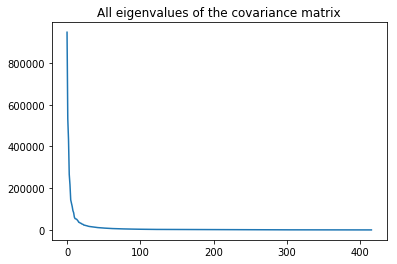

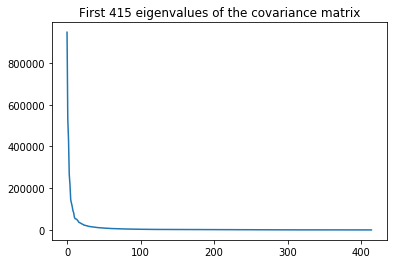

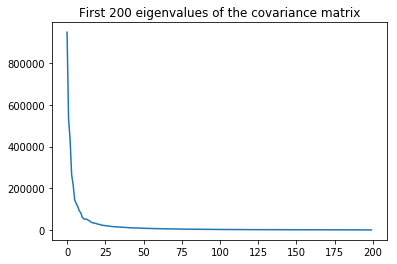

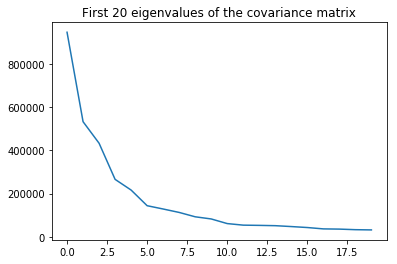

<Figure size 432x288 with 0 Axes>

In [14]:
# How many zero eigenvalues do we have this time?

print (np.linalg.matrix_rank(cov_ld)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals_ld == np.zeros(eigvals_ld.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((abs(eigvals_ld) >= np.ones(eigvals_ld.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals_ld.max()) # The largest eigenvalue
print (eigvals_ld[414])
print (eigvals_ld[415])

# Let's visualise the eigenvalues

x = np.arange(0, 416)

# All of them
plt.plot(x, eigvals_ld) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals_ld[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals_ld[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals_ld[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [21]:
# What is the relationship between the eigenvalues and the eigenvectors resulting from the two methods

print (eigvals[:416]-eigvals_ld, (eigvals[:416]-eigvals_ld).shape)
# The results are zero therefore the eigenvalues are identical

eigvecs_ld_cmp = np.dot(pca_train_norm.T, eigvecs_ld)
eigvecs_ld_cmp = eigvecs_ld_cmp/np.linalg.norm(eigvecs_ld_cmp,axis=0)
print (abs(eigvecs[:, :416])-abs(eigvecs_ld_cmp))
# Note that the values that correspond to the non-zero eigenvalues are zero.
# This means that the direction of the eigenvectors corresponding to the nonzero eigenvalues are the same!

[ 2.44472176e-09 -1.16415322e-10  1.16415322e-10 -1.74622983e-10
  1.45519152e-10  2.61934474e-10 -2.91038305e-11  3.49245965e-10
  1.30967237e-10 -1.16415322e-10 -9.45874490e-11 -8.73114914e-11
 -4.36557457e-10  2.18278728e-10  4.36557457e-11 -1.67347025e-10
  1.89174898e-10 -8.73114914e-11  2.91038305e-11  1.78260962e-10
  8.73114914e-11  1.63709046e-10  8.00355338e-11  6.18456397e-11
 -1.81898940e-11 -9.09494702e-11  1.27329258e-10  9.82254278e-11
  2.14640750e-10 -5.45696821e-11 -3.27418093e-11  1.63709046e-10
 -5.45696821e-11 -1.56433089e-10 -2.36468622e-11 -1.81898940e-11
 -1.07320375e-10  3.81987775e-11  5.09317033e-11 -1.00044417e-10
  5.82076609e-11 -5.82076609e-11 -1.45519152e-11  6.18456397e-11
  1.63709046e-11  1.10958354e-10  1.09139364e-11  1.45519152e-11
  7.45785655e-11  5.45696821e-12  6.00266503e-11  9.09494702e-12
  2.91038305e-11  6.63931132e-11  7.27595761e-12 -4.36557457e-11
  3.63797881e-12 -9.09494702e-12 -2.18278728e-11  1.81898940e-11
 -1.36424205e-11  1.00044

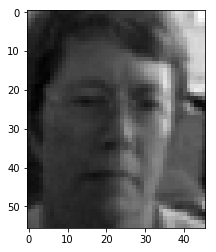

In [23]:
# Let's try to reconstruct one face image, just as a sanity check to see if we can still see a face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(eigvecs_best, proj_pca_train_norm[0, :])
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

Testing

In [17]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting
print (pca_test_norm, pca_test_norm.shape)

# Then let's project each testing image to the eigenspace (space spanned by the best eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], eigvecs_best)

print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image

[[ 7.95913462e+00  4.78485577e+01 -4.41826923e+00 ... -6.83028846e+01
  -6.68701923e+01 -6.54927885e+01]
 [-1.00408654e+01 -1.01514423e+01 -5.41826923e+00 ...  5.76971154e+01
   5.01298077e+01  5.55072115e+01]
 [ 6.69591346e+01  6.48485577e+01  7.65817308e+01 ... -2.73028846e+01
  -2.38701923e+01 -2.64927885e+01]
 ...
 [ 8.95913462e+00  1.08485577e+01  1.45817308e+01 ... -9.30288462e+00
  -2.88701923e+01 -2.94927885e+01]
 [-4.08653846e-02 -1.51442308e-01  5.81730769e-01 ... -2.73028846e+01
  -2.68701923e+01 -2.54927885e+01]
 [-1.30408654e+01 -2.41514423e+01 -5.34182692e+01 ...  4.26971154e+01
   2.31298077e+01  3.85072115e+01]] (104, 2576)
[[ -100.39055795  -945.99035314 -1408.05654249 ...    34.59095889
      5.51766439     8.22856717]
 [  327.38836781   657.66134944  -432.86432675 ...    -5.0870525
     14.10194686    22.57623521]
 [ -775.7538293   -479.79835341   137.12959003 ...   -26.14914478
      3.15943808    31.05050216]
 ...
 [ -382.48165463  -794.94140959   966.62182096 ... 

[2463.31014883 2850.22843355 3799.83126065 2051.07203751 3150.71956779
 2872.91475959 3164.01742245 3350.9121652  2990.27974084 3450.86026059
 3725.38478811 3386.15662955 3534.84060679 3032.09005285 2239.05833163
 3466.79986025 3622.03176374 3020.5684818  3307.30027954 2624.56823191
 2356.95853436 3000.0902828  3570.84166941 2433.94936791 2751.50101384
 3568.4808266  2086.43306309 2440.40704185 2320.96918033 2801.82416523
 2805.97232382 3230.87204316 2525.6536013  2891.75201456 3077.52178913
 3262.96167299 2790.72255801 3014.88624752 3009.17420021 2992.10320592
 2016.89221158 2908.6742693  2736.67532935 3734.30412115 2226.878793
 1799.3869945  3054.34245365 2877.54287018 3422.68611353 3140.16910431
 3781.79774384 3252.21586957 2494.14720355 2558.62489962 3078.27022138
 2584.32327529 2825.16769061 3002.15027516 2214.86788862 2470.5229012
 3543.80969236 2448.69900649 2573.14566098 3696.72200733 3009.95073599
 3439.30227223 2525.7997114  3200.39292482 3820.49766796 2170.56652017
 2768.268

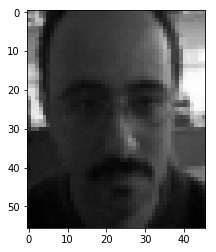

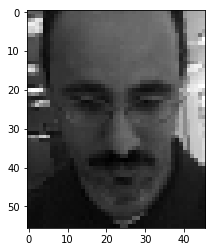

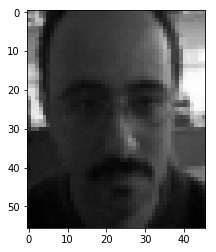

In [18]:
# Let's classify the first image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

distances = np.zeros(416)

for i in range(416):
    distances[i] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[0, :])
    
print (distances, distances.shape)

smallest_distance = distances.min()
smallest_index = distances.argmin()
print (smallest_distance, smallest_index)

# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576])
# Which identity does it actually belong to?
print (test[0, 2576])

# Print the picture that our picture is the closest to
plt.imshow(np.reshape(pca_train[smallest_index, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

# Print our actual image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')

In [19]:
# Now let's do this for all of the testing images

distances = np.zeros((416, 104)) # In each row we store the distances (1 column = 1 testing image's distances)

for k in range (104):
    for i in range(416):
        distances[i, k] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[k, :])
        
# Now we have in each column the distances of the testing images from each of the training images.
# Next step is to find the minimum of each column, and the corresponding row index (per column)
print (distances, distances.shape)

smallest_distance = distances.min(axis=0) # min per columns
smallest_index = distances.argmin(axis=0)
print (smallest_distance, smallest_distance.shape)
print (smallest_index, smallest_index.shape)

# Get the smallest distance image's label
#detected_label = np.zeros (104)
#for j in range(104):
#    detected_label[j] = training[smallest_index[j], 2576]
#print (detected_label, detected_label.shape)

actual_label = test [:, 2576].T

print (actual_label, actual_label.shape)


# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576], training[smallest_index, 2576].shape)

same = (training[smallest_index, 2576]==actual_label)

print (same, same.shape)

percentage = np.sum(same)/104

print (percentage)


[[2463.31014883 2540.03386006 2255.3867446  ... 2565.93124532
  2402.17142795 2775.56659548]
 [2850.22843355 2913.25618807 2517.38379006 ... 2157.60251417
  2580.89780883 2754.18182655]
 [3799.83126065 2651.30100106 3921.4404475  ... 4085.49597949
  3178.15682693 3281.07685844]
 ...
 [3594.91727797 2407.60781618 3053.76654148 ... 2623.02968812
  2494.2187365  2220.37086426]
 [3214.34954223 3146.72617647 2805.62861939 ... 3250.11665644
  3060.17221034 3412.73587945]
 [3524.17983687 3146.59048291 3830.77894029 ... 3466.06233648
  3382.68354518 3551.73283848]] (416, 104)
[1799.3869945  1700.29710537 2058.63559528 1595.99839316 1770.18386083
 1527.71532026 2110.71719829 1187.46840935 1672.24588494 1247.416949
 1782.62733369 1571.00310051 1869.03065892 1808.68568446 1588.58710349
 1754.18346593 1797.10734519 1608.2311544  1242.78704374 1572.27977025
 1715.89851614 1809.98287858 1705.75452877  811.60722577 1232.93127385
 1436.82869373 1754.51335884 1697.07273808 1411.31513768 1973.41294806
 

In [20]:
def highdimension():
    eigvals_hd, eigvecs_hd = np.linalg.eig(cov)
    return

#def lowdimension():
#    eigvals2_ld, eigvecs2_ld = np.linalg.eig(cov2)
#    return

def donothing():
    x=1123
    return

#mem_low = max(memory_usage(proc=lowdimension))
mem_high = max(memory_usage(proc=highdimension))
mem_nothing = max(memory_usage(proc=donothing))

#print("Maximum memory used by low dimension way: {0} MiB".format(str(mem_low)))
print("Maximum memory used by high dimension way: {0} MiB".format(str(mem_high)))
print("Maximum memory used by donothing: {0} MiB".format(str(mem_nothing)))

# Check it tomorrow, strange that the memory usage of donothing and lowdimension if the same, but don't know why yet

Maximum memory used by high dimension way: 646.0 MiB
Maximum memory used by donothing: 442.17578125 MiB
